# TP2 Audionumérique Parole et Musique (3SN Multimedia)

Vous pouvez réaliser ce TP en binôme (un seul rendu, mais complétez bien les informations ci-dessous).

**NOM** : LAFARGUE

**Prénom** : Héloïse

**Email** : hls.lafargue@gmail.com


Initialisation de l'environnement de TP

In [1]:
# OS setup
#!cat /etc/os-release
!apt-get install -qq bc tree sox

# Liaison avec les données
!git clone https://gitlab.com/jeromefarinas/tp-3en-n7.git

# Spectrum
!pip install spectrum

Selecting previously unselected package bc.
(Reading database ... 121658 files and directories currently installed.)
Preparing to unpack .../0-bc_1.07.1-3build1_amd64.deb ...
Unpacking bc (1.07.1-3build1) ...
Selecting previously unselected package libopencore-amrnb0:amd64.
Preparing to unpack .../1-libopencore-amrnb0_0.1.5-1_amd64.deb ...
Unpacking libopencore-amrnb0:amd64 (0.1.5-1) ...
Selecting previously unselected package libopencore-amrwb0:amd64.
Preparing to unpack .../2-libopencore-amrwb0_0.1.5-1_amd64.deb ...
Unpacking libopencore-amrwb0:amd64 (0.1.5-1) ...
Selecting previously unselected package libsox3:amd64.
Preparing to unpack .../3-libsox3_14.4.2+git20190427-2+deb11u2ubuntu0.22.04.1_amd64.deb ...
Unpacking libsox3:amd64 (14.4.2+git20190427-2+deb11u2ubuntu0.22.04.1) ...
Selecting previously unselected package libsox-fmt-alsa:amd64.
Preparing to unpack .../4-libsox-fmt-alsa_14.4.2+git20190427-2+deb11u2ubuntu0.22.04.1_amd64.deb ...
Unpacking libsox-fmt-alsa:amd64 (14.4.2+git

In [2]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import scipy.signal
import numpy as np
from IPython.display import Audio

In [3]:
!tree tp-3en-n7/signaux/alpha/

tp-3en-n7/signaux/alpha/
├── mots_inconnus
│   ├── alpha.wav
│   ├── bravo.wav
│   ├── charlie.wav
│   ├── delta.wav
│   ├── echo.wav
│   ├── foxtrott.wav
│   ├── golf.wav
│   ├── hotel.wav
│   ├── india.wav
│   ├── juliett.wav
│   ├── kilo.wav
│   ├── lima.wav
│   └── mike.wav
└── references
    ├── alpha.wav
    ├── bravo.wav
    ├── charlie.wav
    ├── delta.wav
    ├── echo.wav
    ├── foxtrott.wav
    ├── golf.wav
    ├── hotel.wav
    ├── india.wav
    ├── juliett.wav
    ├── kilo.wav
    ├── lima.wav
    └── mike.wav

2 directories, 26 files


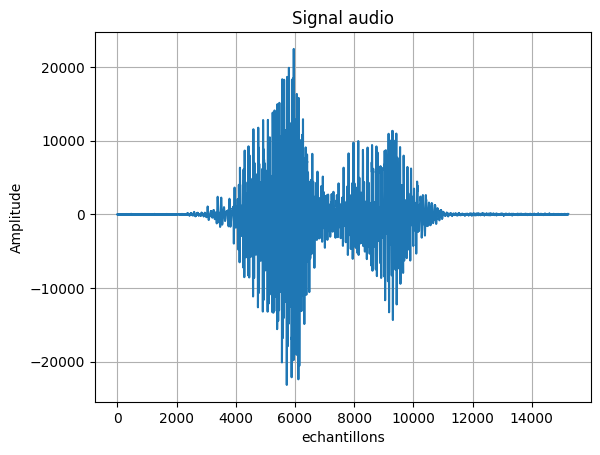

In [4]:
(fe,signal) =  scipy.io.wavfile.read("tp-3en-n7/signaux/alpha/references/bravo.wav")
# Affichage du signal
plt.figure(1)
plt.plot(np.arange(len(signal)),signal)
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()
# lecture du fichier
Audio(data=signal, rate=fe)

Nous allons commencer par travailler sur un extrait voisé du signal :

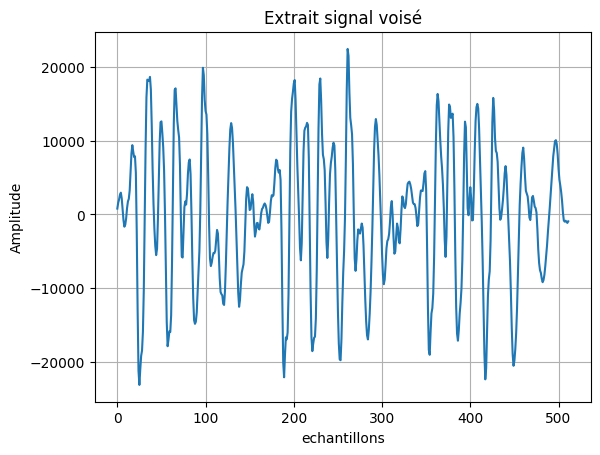

In [5]:
extrait = signal[5700:6212]
# Affichage du signal
plt.figure(1)
plt.plot(np.arange(len(extrait)),extrait)
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Extrait signal voisé')
plt.grid(True)
plt.show()

***Affichez une fenetre hamming de 512 points. Puis créez la variable extrait_fenetre qui resulte de la multiplication point par point de la fenetre de hamming et de l'extrait de signal. Affichez le signal résultant.***

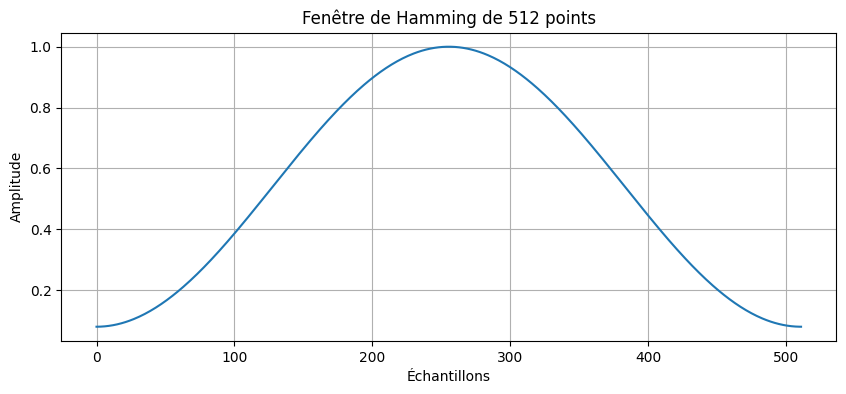

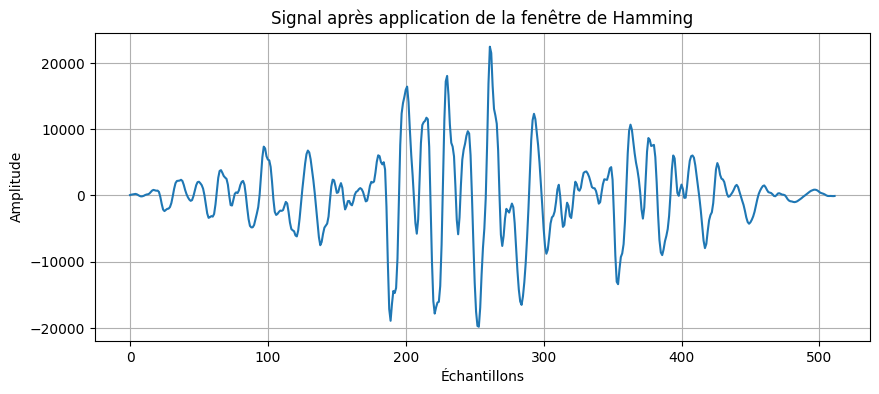

In [6]:
# a vous

# Nombre de points
N = 512
# Fenêtre de Hamming
hamming_window = np.hamming(N)

# Affichage de la fenêtre de Hamming
plt.figure(figsize=(10, 4))
plt.plot(hamming_window)
plt.title('Fenêtre de Hamming de 512 points')
plt.xlabel('Échantillons')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Vérification de la longueur de l'extrait
if len(extrait) != N:
    print("Attention : La longueur de l'extrait n'est pas de 512 points. Ajustez la longueur de l'extrait.")

# Multiplication point par point
extrait_fenetre = hamming_window * extrait

# Affichage du signal résultant
plt.figure(figsize=(10, 4))
plt.plot(extrait_fenetre)
plt.title('Signal après application de la fenêtre de Hamming')
plt.xlabel('Échantillons')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


***Affichez le spectre de puissance de la transformée de Fourier de l'extrait fenetré. Représentez les fréquences en abscisse. Vous pouvez utiliser la fonction np.fft.fft pour calculer la transformée de Fourier ou bien utiliser son équivalent sur librosa.***

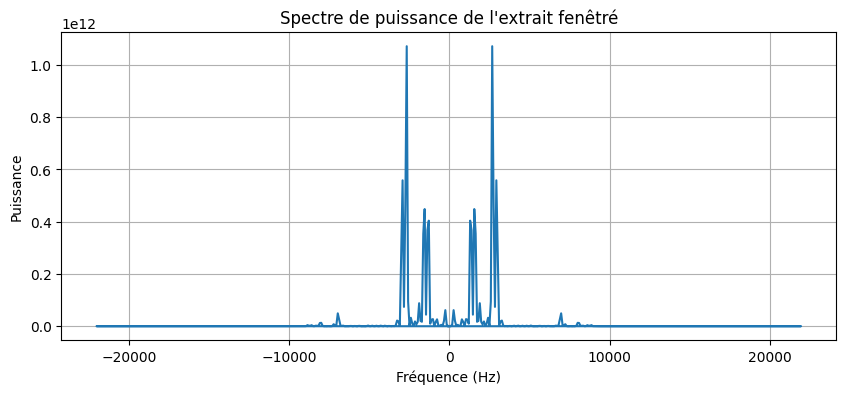

In [7]:
# A vous...

# Calcul de la transformée de Fourier
fft_extrait = np.fft.fft(extrait_fenetre)

# Calcul du spectre de puissance (carré de la magnitude de la FFT)
spectre_puissance = np.abs(fft_extrait)**2

# Création de l'axe des fréquences
freqs = np.fft.fftfreq(len(extrait_fenetre), d=1/44100)  # Remplacer 44100 par la fréquence d'échantillonnage réelle si différente

# Affichage du spectre de puissance
plt.figure(figsize=(10, 4))
plt.plot(freqs, spectre_puissance)
plt.title("Spectre de puissance de l'extrait fenêtré")
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Puissance')
plt.grid(True)
plt.show()


***Affichez un spectrogramme du signal de départ.***

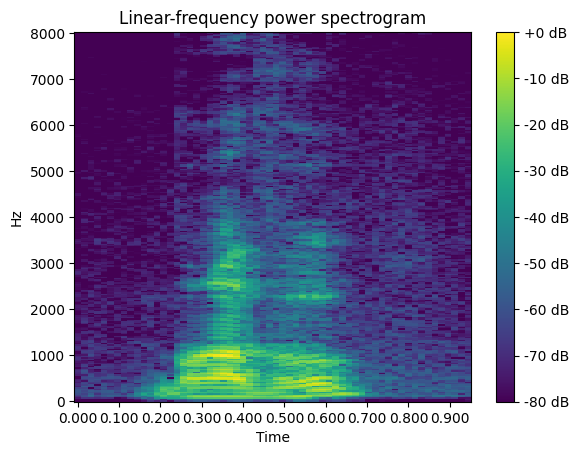

In [8]:
# A vous...

import librosa
import librosa.display
d, sr = librosa.load('tp-3en-n7/signaux/alpha/references/bravo.wav', sr=16000, mono=True)
sp = np.abs(librosa.stft(d, n_fft=512, hop_length=256, window=np.hanning(512 + 2)[1:-1]))
sp = 20.0 * np.log10(np.maximum(sp, np.max(sp) / 1e6))
sp = sp - np.mean(sp)
sp = sp - np.max(sp)
librosa.display.specshow(sp, sr=16000, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

Le spectrogramme montre une activité énergétique concentrée principalement dans les basses fréquences (en dessous de 2000 Hz), avec des pics d'intensité marqués qui correspondent probablement aux formants de la voix humaine, indiquant les voyelles sonores du mot "bravo". On remarque également des régions de moindre intensité entre ces pics, qui peuvent correspondre aux consonnes ou à des pauses entre les syllabes.

***Calculez le log énergie du signal sur des fenêtres de 512 points avec recouvrement sur la moitié. Affichez les valeurs ainsi calculées aligné avec le signal.***

$E=\log\left(\sum_{i=1}^{n}x_{i}^{2}\right)$

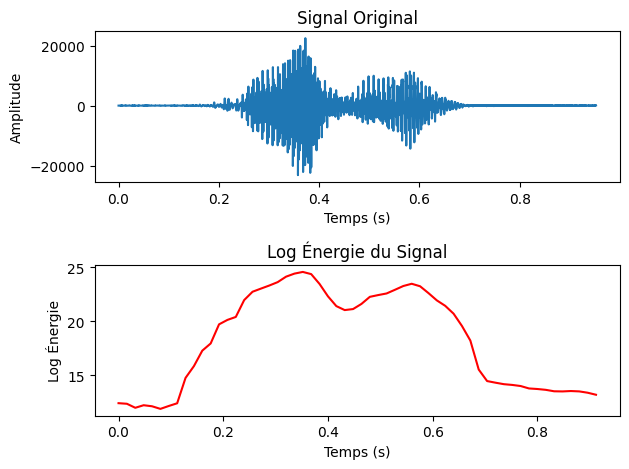

In [9]:
# A vous

# Conversion du signal en type flottant
signal = signal.astype(float)

# Paramètres de la fenêtre
taille_fenetre = 512
recouvrement = taille_fenetre // 2
n_fenetres = (len(signal) - recouvrement) // (taille_fenetre - recouvrement)

# Calcul du log énergie pour chaque fenêtre
log_energie = []
for i in range(n_fenetres):
    debut = i * (taille_fenetre - recouvrement)
    fin = debut + taille_fenetre
    fenetre = signal[debut:fin]
    energie = np.log(np.sum(fenetre**2))
    log_energie.append(energie)


# Création de l'axe de temps pour l'énergie
temps_energie = np.arange(0, len(log_energie)) * (taille_fenetre - recouvrement) / fe

plt.figure()
# Affichage du signal
plt.subplot(2, 1, 1)
temps_signal = np.arange(len(signal)) / fe
plt.plot(temps_signal, signal)
plt.title("Signal Original")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")

# Affichage du log énergie
plt.subplot(2, 1, 2)
plt.plot(temps_energie, log_energie, color='r')
plt.title("Log Énergie du Signal")
plt.xlabel("Temps (s)")
plt.ylabel("Log Énergie")

plt.tight_layout()
plt.show()


La log-énergie reflète l'intensité du signal et suit les contours de l'activité vocale, montrant les pics correspondant aux moments les plus sonores de l'enregistrement.

***Peut-on repérer les voyelles facilement avec cette représentation ?***

Les voyelles peuvent être identifiées par des zones où l'énergie est plus élevée : environ 0.38s et 0.58s.

Ceci est dû à la nature de la production des voyelles dans la parole humaine, qui implique généralement une vibration plus forte et plus soutenue des cordes vocales, résultant en une énergie plus grande dans le signal audio.

***Calculez le cepstre de l'extrait de signal (cf. slide 96 du cours). Calculez vous-même ce cepstre en enchainant les fonctions (n'utilisez pas une fonction toute faite pour le calculer). Affichez le. Où se trouve l'excitation liée à la vibration des cordes vocales ?***

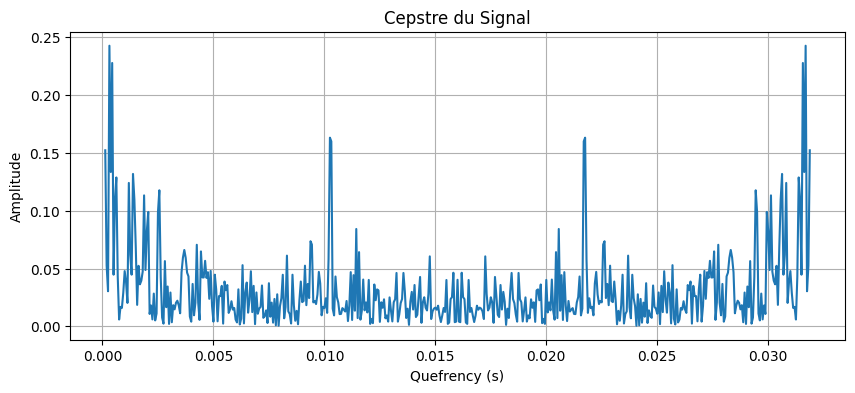

In [10]:
# A vous...

# Calcul de la FFT du signal
fft_signal = np.fft.fft(extrait)

# Calcul du log de la magnitude du spectre
log_magnitude = np.log(np.abs(fft_signal))

# Calcul de la FFT inverse du log de la magnitude pour obtenir le cepstre
cepstre = np.fft.ifft(log_magnitude)

# Calcul de la quefrency
quefrency = np.arange(len(cepstre)) / fe

# Affichage du cepstre
plt.figure(figsize=(10, 4))
plt.plot(quefrency[2:-1], np.abs(cepstre)[2:-1]) # on retire les 2 premières et la dernière valeurs pour bien visualiser
plt.title("Cepstre du Signal")
plt.xlabel('Quefrency (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


On peut voir le fondamental avec le pic à 0.010s, on peut donc en déduire que c'est une voix à 100Hz et donc que c'est un homme qui parle.

***Calculez et affichez le spectre lissé (le spectre du début du cepstre) de cet extrait.***

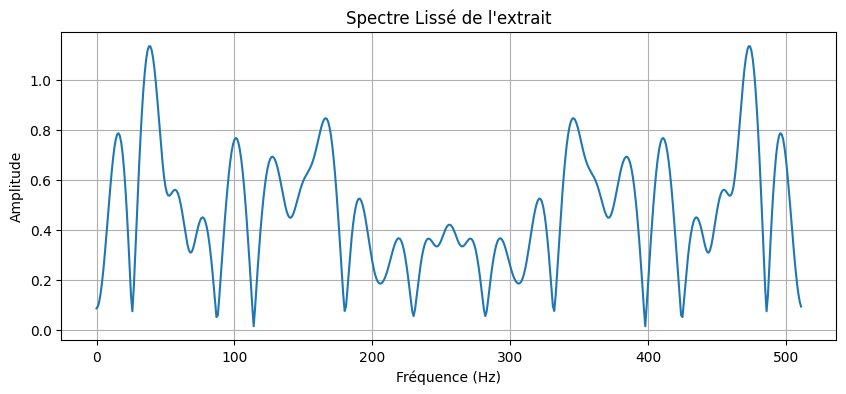

In [11]:
# A vous...

# Calcul du cepstre du signal
fft_signal = np.fft.fft(extrait)
log_magnitude = np.log(np.abs(fft_signal))
cepstre = np.fft.ifft(log_magnitude).real

# Calcul du spectre lissé en ne gardant que le début du cepstre
spectre_lisse = np.fft.fft(cepstre[2:33], 512)

# Affichage du spectre lissé
plt.figure(figsize=(10, 4))
plt.plot(np.abs(spectre_lisse))
plt.title("Spectre Lissé de l'extrait")
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


***En utilisant librosa, affichez une matrice des 12 premiers coefficients MFCC
du signal de départ.***

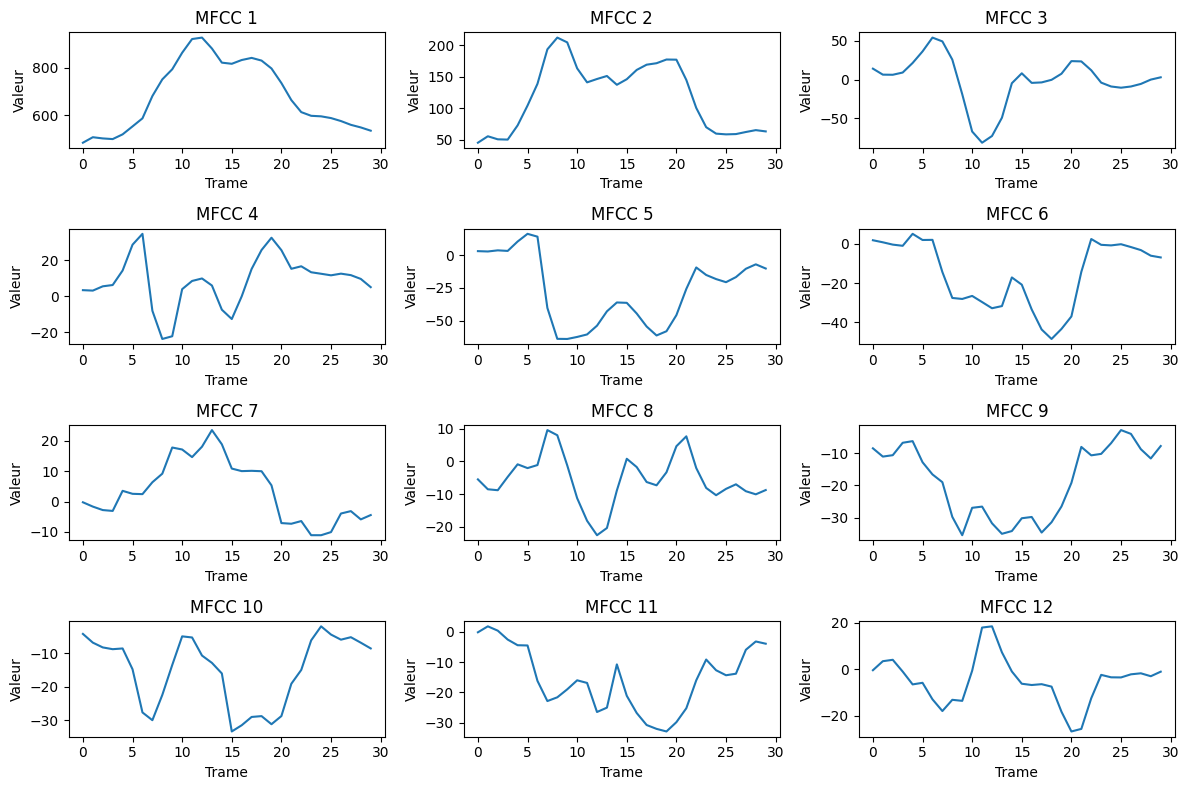

In [12]:
# A vous...

# Calcul des MFCC
mfccs = librosa.feature.mfcc(y=signal, sr=fe, n_mfcc=12)

# Afficher les plots des 12 listes de 30 points des MFCC
plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.plot(mfccs[i])
    plt.title(f'MFCC {i+1}')
    plt.xlabel('Trame')
    plt.ylabel('Valeur')
plt.tight_layout()
plt.show()

***Ajoutez a cette matrice votre propre calcul de l'énergie normalisé. Y a-t-il une corrélation avec un des coefficients MFCC ?***

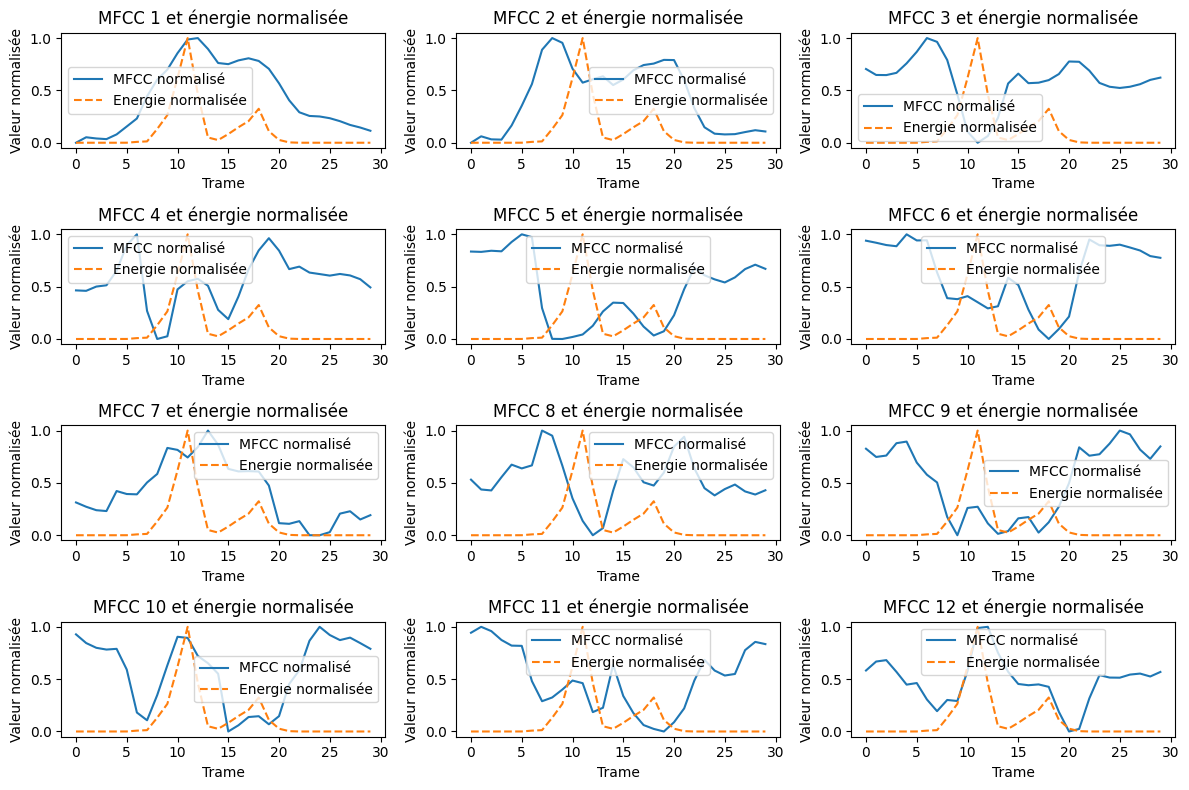

In [13]:
# A vous...

# Normaliser les MFCCs
mfccs_norm = np.empty_like(mfccs)
for i in range(mfccs.shape[0]):
    mfccs_norm[i] = (mfccs[i] - np.min(mfccs[i])) / (np.max(mfccs[i]) - np.min(mfccs[i]))

# Calculer l'énergie pour chaque trame
hop_length = len(signal) // len(mfccs[0])  # Longueur de la trame en échantillons
energie = np.array([sum(signal[int(i * hop_length):int((i + 1) * hop_length)]**2) for i in range(len(mfccs[0]))])

# Normaliser l'énergie
energie_normalisee = energie / np.max(energie)

# Afficher les MFCCs et l'énergie normalisée
plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.plot(mfccs_norm[i], label='MFCC normalisé')
    plt.plot(energie_normalisee, label='Energie normalisée', linestyle='--')
    plt.title(f'MFCC {i+1} et énergie normalisée')
    plt.xlabel('Trame')
    plt.ylabel('Valeur normalisée')
    plt.legend()

plt.tight_layout()
plt.show()


Réponse...

On voit clairemenr que les deux premières MFCC contribuent principalement à l'énergie du signal. Elles sont très corrélées avec l'énergie.

Sur les autres MFCC on trouve des corrélations négatives ou positives, par exemple sur la 3e, la corrélation est négative au niveau du pic d'énergie.

Calculez et affichez les dérivées premières et secondes de ces MFCC (vous pouvez utiliser des [fonctions d'extraction de paramètres de librosa](https://librosa.org/doc/main/feature.html)).

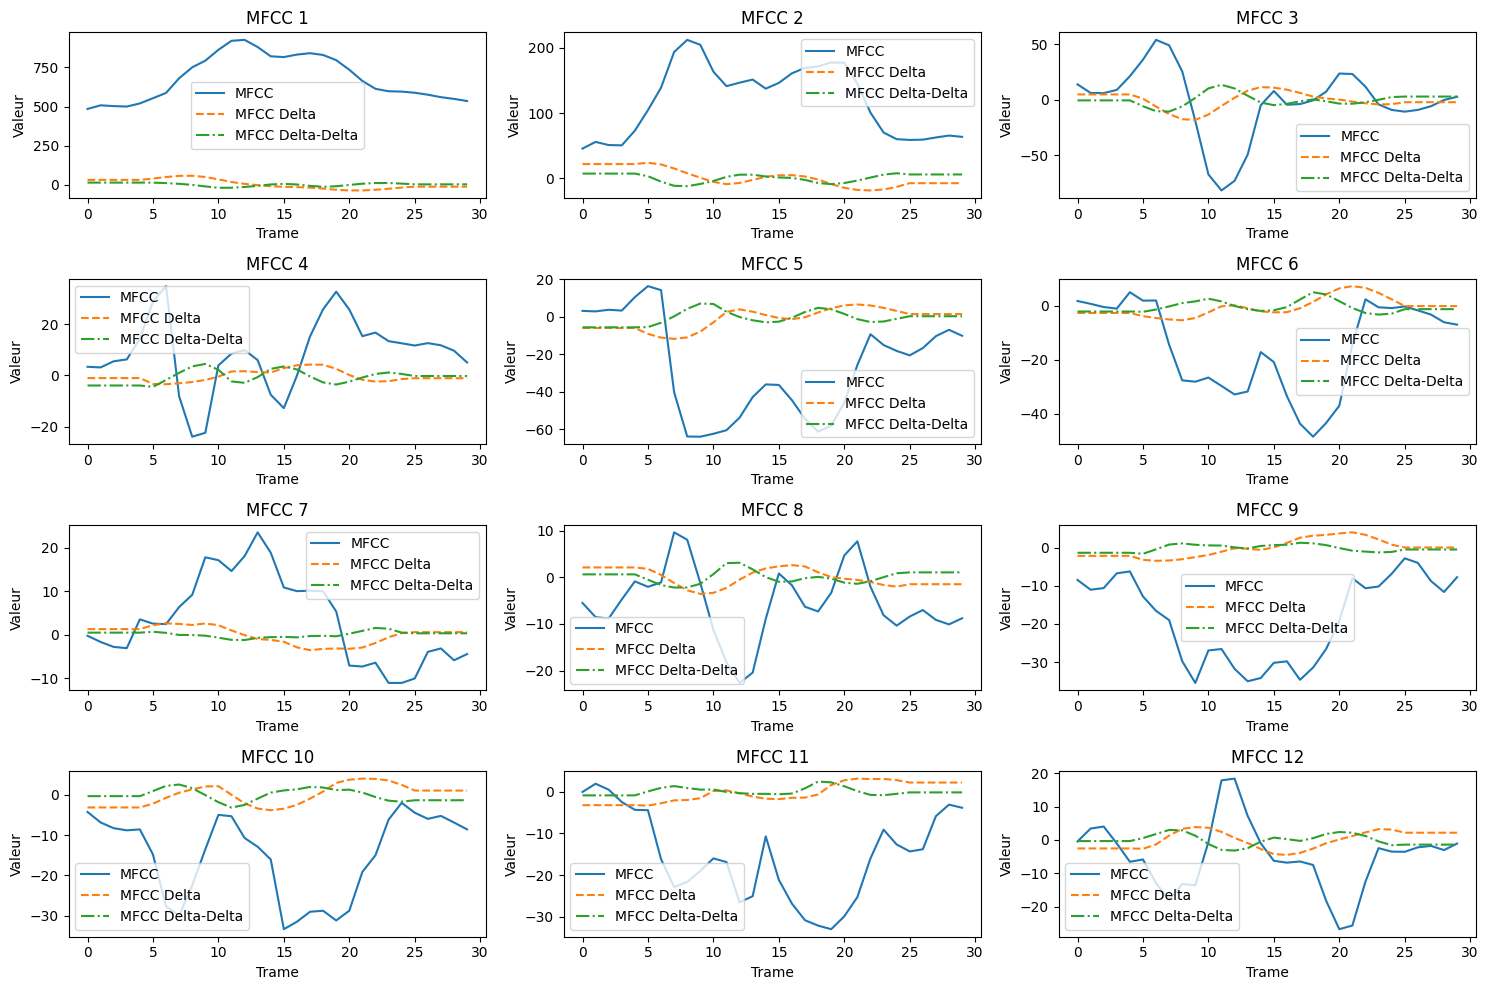

In [14]:
# A vous...

# Calcul des dérivées premières (delta coefficients)
mfcc_delta = librosa.feature.delta(mfccs)

# Calcul des dérivées secondes (delta-delta coefficients)
mfcc_delta2 = librosa.feature.delta(mfccs, order=2)

# Affichage des MFCCs, delta et delta-delta coefficients
plt.figure(figsize=(15, 10))

for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.plot(mfccs[i], label='MFCC')
    plt.plot(mfcc_delta[i], label='MFCC Delta', linestyle='--')
    plt.plot(mfcc_delta2[i], label='MFCC Delta-Delta', linestyle='-.')
    plt.title(f'MFCC {i+1}')
    plt.xlabel('Trame')
    plt.ylabel('Valeur')
    plt.legend()

plt.tight_layout()
plt.show()


***En utilisant les MFCC, mettez en place un détecteur d'activité vocale afin de filtrer les fichiers que vous avez à traiter : visualisez le résultats sur les signaux "references" (affichage du signal et matérialisation des zones de silence). Vous ne devez pas altérer les zones de silences de moins de 300 ms comprises dans les zones de parole.***

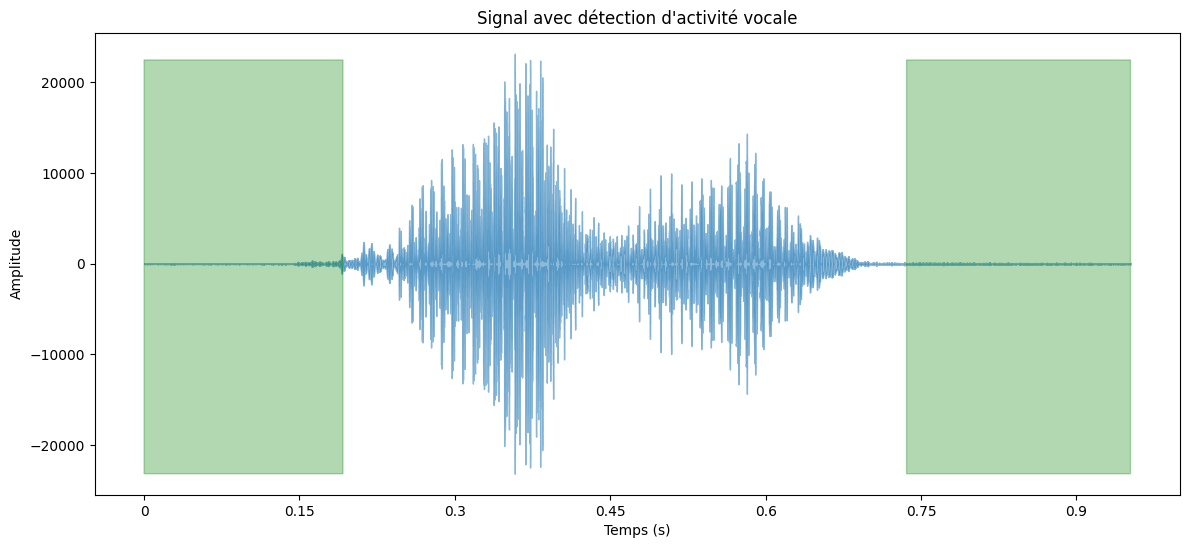

In [18]:
# Calcul de la durée d'une trame MFCC (en secondes)
hop_length = 512  # nombre de points avec recouvrement sur la moitié
frame_duration = hop_length / fe

# Convertir 300 ms en nombre de trames MFCC
min_silence_frames = int(0.3 / frame_duration)
# Calcul de l'énergie pour chaque trame des MFCC
energie_mfcc = np.sum(mfccs ** 2, axis=0)

# Seuil d'énergie pour la détection de la parole
seuil_energie = np.percentile(energie_mfcc, 70)  # Utilisation du X ème percentile comme seuil

# Détecter les zones de parole (où l'énergie est au-dessus du seuil)
zones_parole = energie_mfcc > seuil_energie

# Convertir 300 ms en nombre de trames MFCC
min_silence_frames = int(0.3 * fe / hop_length)

# Appliquer un lissage pour éviter de segmenter les silences de moins de 300 ms
# Créer un noyau pour la convolution qui permet de lisser les zones de parole
kernel = np.ones(min_silence_frames)
# Lisser les zones de parole
zones_parole_lissees = np.convolve(zones_parole, kernel, mode='same') > 0

# Etirement du tableau 'zones_parole' pour qu'il corresponde à la longueur du signal
zones_parole_etirees = np.repeat(zones_parole_lissees, hop_length)
zones_parole_etirees = zones_parole_etirees[:len(signal)]

# Créer un masque pour les zones de silence
zones_silence = ~zones_parole_etirees

# Créer un tableau de temps correspondant au signal
temps = np.linspace(0, len(signal) / fe, num=len(signal))

# Affichage du signal avec mise en évidence des zones de silence
plt.figure(figsize=(14, 6))
librosa.display.waveshow(signal, sr=fe, alpha=0.5)
plt.fill_between(temps, signal.min(), signal.max(), where=zones_silence, color='green', alpha=0.3)

plt.title('Signal avec détection d\'activité vocale')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.show()
